<a href="https://colab.research.google.com/github/BigBubl1k/Poker_text_recognition/blob/master/Poker_%D0%A2%D1%8E%D1%80%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Нам нужно из скриншота игрового поля игры в покер получить данные о размере стеков, ставок и банк, а затем создать текстовый файл, куда эти данные будут записаны с помощью библиотек управления граическим интерфейсом
Разделим решение задачи на 2 этапа

#1 этап: прочтем текстовую информацию с изображения с помощью pytesseract

устанавливаем тессеракт и последнюю версию PIL

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
!pip install Pillow==9.0.0

импортируем библиотеки

In [3]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image


In [4]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

%matplotlib inline   
#нужна, чтобы графики от matplotlib отображать в ноутбуке

посмотрим на изображение

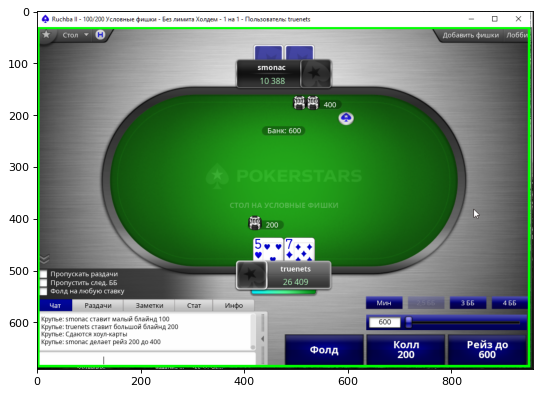

In [5]:
img = cv2.imread("test.png") #читаем изображение
plt.figure(figsize=(8, 6), dpi=80)
#выводим изображение с помощью matplotlib
plt.imshow(img)
plt.show()

Теперь воспользуемся возможностями tesseract и посмотрим, как он извлечет текст из оригинального изображения без обработки

In [ ]:
image_path_in_colab='test.png'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

@ Ruchba Il- 100/200 Yenoetie nusen - Bes nnnura Xongem - 1 Ha 1 - Mlonszosarens: truenets

ees csr
earn a
Ce ace ay

Pasqaum | 3amerkn

Kpynte: smonac crasut mani Gravina 100
6 6naiiHa 200

As
SLO? =I}

Ros
Pee)

Fer a

 



Нужно обработать изображение, чтобы текст было проще выделить

In [ ]:
#продублируем изображение и поработаем с ним
image = Image.open('test.png')
image.save('sample.png')

In [ ]:
img = cv2.imread("sample.png") #чтение изображения с помощью метода OpenCV

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Преобразование цветного изображения в полутоновое для лучшей обработки текста

In [ ]:
#Теперь преобразуем полутоновое изображение в бинарное, чтобы повысить вероятность извлечения текста
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |
                                          cv2.THRESH_BINARY_INV)
cv2.imwrite('threshold_image.png',thresh1)

True

Теперь посмотрим, что получилось после обработки:

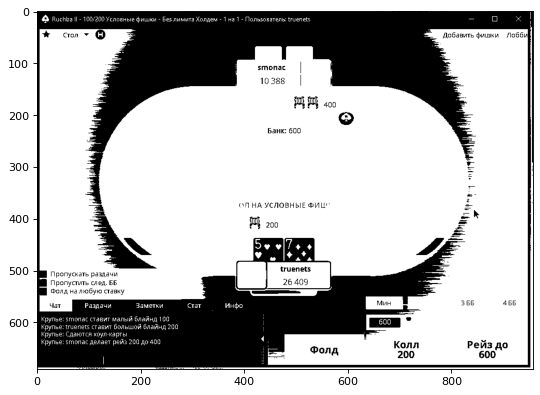

In [ ]:
img = cv2.imread("threshold_image.png") #читаем изображение
plt.figure(figsize=(8, 6), dpi=80)
#выводим изображение с помощью matplotlib
plt.imshow(img)
plt.show()

Нам нужны: стек, ставки и банк, они отлично выделяются

Посмотрим на результат работы tesseract:

In [ ]:
image_path_in_colab='threshold_image.png'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

ee eee oy eee Rees

AoGaauTs uk

smonac
10 388

I 200
oe

Bank: 600

O71 HA YCAOBHBIE OUL!

Mponyckats pasgaun
Mponycturs cen, BB
@ong Ha moGyto craBKy

feereea) pee

Sea)
Beamer ea)
Poe)

conn

 



Результат гораздо лучше, мы видим банк и стек одного из игроков

 но не вывелся стек игрока truents и ставки игроков

Попробуем обрезать изображение, чтобы в нем было меньше информации

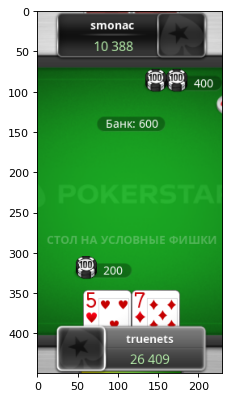

In [63]:
from PIL import Image
im = Image.open("test.png")

crop_rectangle = (360, 90, 590, 540)
cropped_im = im.crop(crop_rectangle)

plt.figure(figsize=(8, 6), dpi=80)
#выводим изображение с помощью matplotlib
plt.imshow(cropped_im)
plt.show()


In [64]:
cropped_im.save('cropped_im.png')

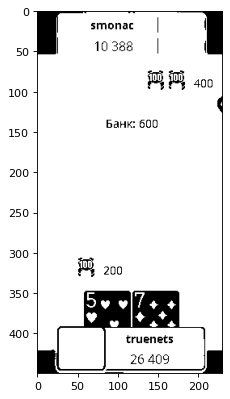

In [65]:

img = cv2.imread("cropped_im.png") #чтение изображения с помощью метода OpenCV
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Преобразование цветного изображения в полутоновое для лучшей обработки текста
#Теперь преобразуем полутоновое изображение в бинарное, чтобы повысить вероятность извлечения текста
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |
                                          cv2.THRESH_BINARY_INV)
cv2.imwrite('threshold_image.png',thresh1)

img = cv2.imread("threshold_image.png") #читаем изображение
plt.figure(figsize=(8, 6), dpi=80)
#выводим изображение с помощью matplotlib
plt.imshow(img)
plt.show()

In [66]:
image_path_in_colab='threshold_image.png'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

smonac | {
| 10388 | {
g g 400

Bank: 600

(

DB 200

truenets

| J} 26409 J



теперь tesseract распознал все данные, что нам были нужны

приведем данные в более удобный вид - отбросим все ненужное

In [67]:
type(extractedInformation)

str

In [81]:
data_about_players = extractedInformation.replace('|','')
data_about_players = data_about_players.replace('{','')
data_about_players = data_about_players.replace('}','')
data_about_players = data_about_players.replace('}','')
data_about_players = data_about_players.replace('J','')
data_about_players = data_about_players.replace('g','')
data_about_players = data_about_players.replace('(','')

print(data_about_players)

smonac  
 10388  
  400

Bank: 600



DB 200

truenets

  26409 



In [83]:
list_of_info = data_about_players.split()
print(list_of_info)

['smonac', '10388', '400', 'Bank:', '600', 'DB', '200', 'truenets', '26409']


In [98]:
player_1 = list_of_info[0] + '\n' + 'stack: ' + list_of_info[1] + '\n  Bet: ' + list_of_info[2]
player_2 = list_of_info[7] + '\n' + 'stack: '+ list_of_info[8] + '\n  Bet: ' + list_of_info[6]
bank = list_of_info[3] + ' ' + list_of_info[4]

In [101]:
print(player_1)
print()
print(player_2)
print()
print(bank)

smonac
stack: 10388
  Bet: 400

truenets
stack: 26409
  Bet: 200

Bank: 600


Мы получили все нужные нам данные

Теперь приступаем к следующему этапу: сохранению данных

#Сохраним данные с помощью pyautogui

установим модуль

In [2]:
!pip install pyautogui

     |████████████████████████████████| 59 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 132 kB 11.3 MB/s 
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.53-py3-none-any.whl size=36614 sha256=a1c067a0bedf597990ad647fc05d4080c259376a69062966418bb8201a6a4626
  Stored in directory: /root/.cache/pip/wheels/23/db/81/a14b5eca81ccb97c15e5bbea8d5394b8cbf6b36451d89dd648
  Created wheel for pygetwindow: filename=PyGetWindow-0.0.9-py3-none-any.whl size=11081 sha256=f5282e7993c9380470d1ecf552223dbe47c1538e38d90d96e969a9fb82d5eb5a
  Stored in directory: /root/.cache/pip/wheels/91/7e/35/62d9062a06cfc46fea39e26860253da36f258b3f3fd96c91c3
  Created wheel for pyscreeze: filename=PyScreeze-0.1.28-py3-none-any.whl size=13021 sha256=e99df485e84

Если мы попробуем импортировать библиотеку, получим ошибку, нужно также установить xlib

In [1]:
!pip install python-xlib

In [4]:
import os

os.environ['DISPLAY'] = ':0'

In [4]:
import pyautogui
pyautogui.PAUSE = 1
pyautogui.FAILSAFE = True
pyautogui.moveTo(100, 100, duration=0.25)
pyautogui.moveTo(200, 100, duration=0.25)
pyautogui.moveTo(200, 200, duration=0.25)
pyautogui.moveTo(100, 200, duration=0.25)
pyautogui.moveTo(100, 100, duration=0.25)

KeyError: ignored

Google colab не поддерживает работу с pyautogui, поэтому решение задачи я продолжу с помощью pycharm - открою ссылку чрез браузер